Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [95]:
# uncomment the code below and execute this cell
library('tidyverse')

If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [96]:
# uncomment the code below and execute this cell
install.packages("palmerpenguins")
library('palmerpenguins')
glimpse(penguins)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


We now have a data frame called `penguins` available. Use this table for the following exercises.

### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the `fill` attribute of the bars.

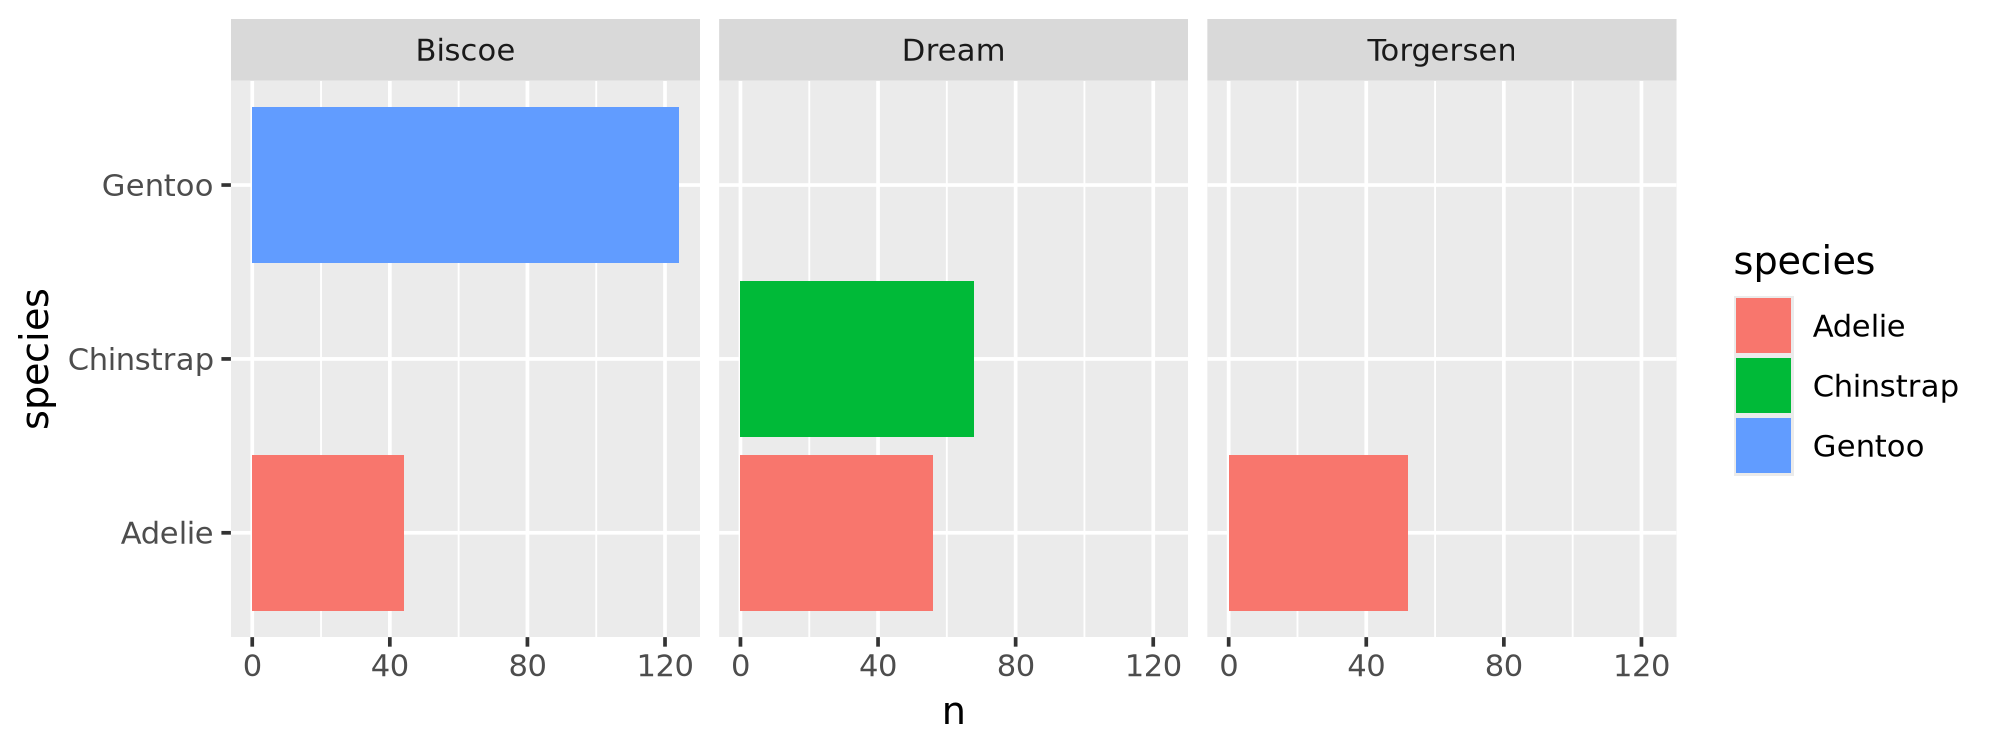

In [97]:
options(repr.plot.width = 8, repr.plot.height = 3)

penguins %>%
    group_by(island) %>%
    count(species) %>%
ggplot(mapping = aes(x = n, y = species, fill = species)) +
    geom_col() +
    facet_wrap(~island, ncol=3)

**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

Adelie penguins were observed in each of the three islands: 
1. Biscoe 
2. Dream
3. Torgersen

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


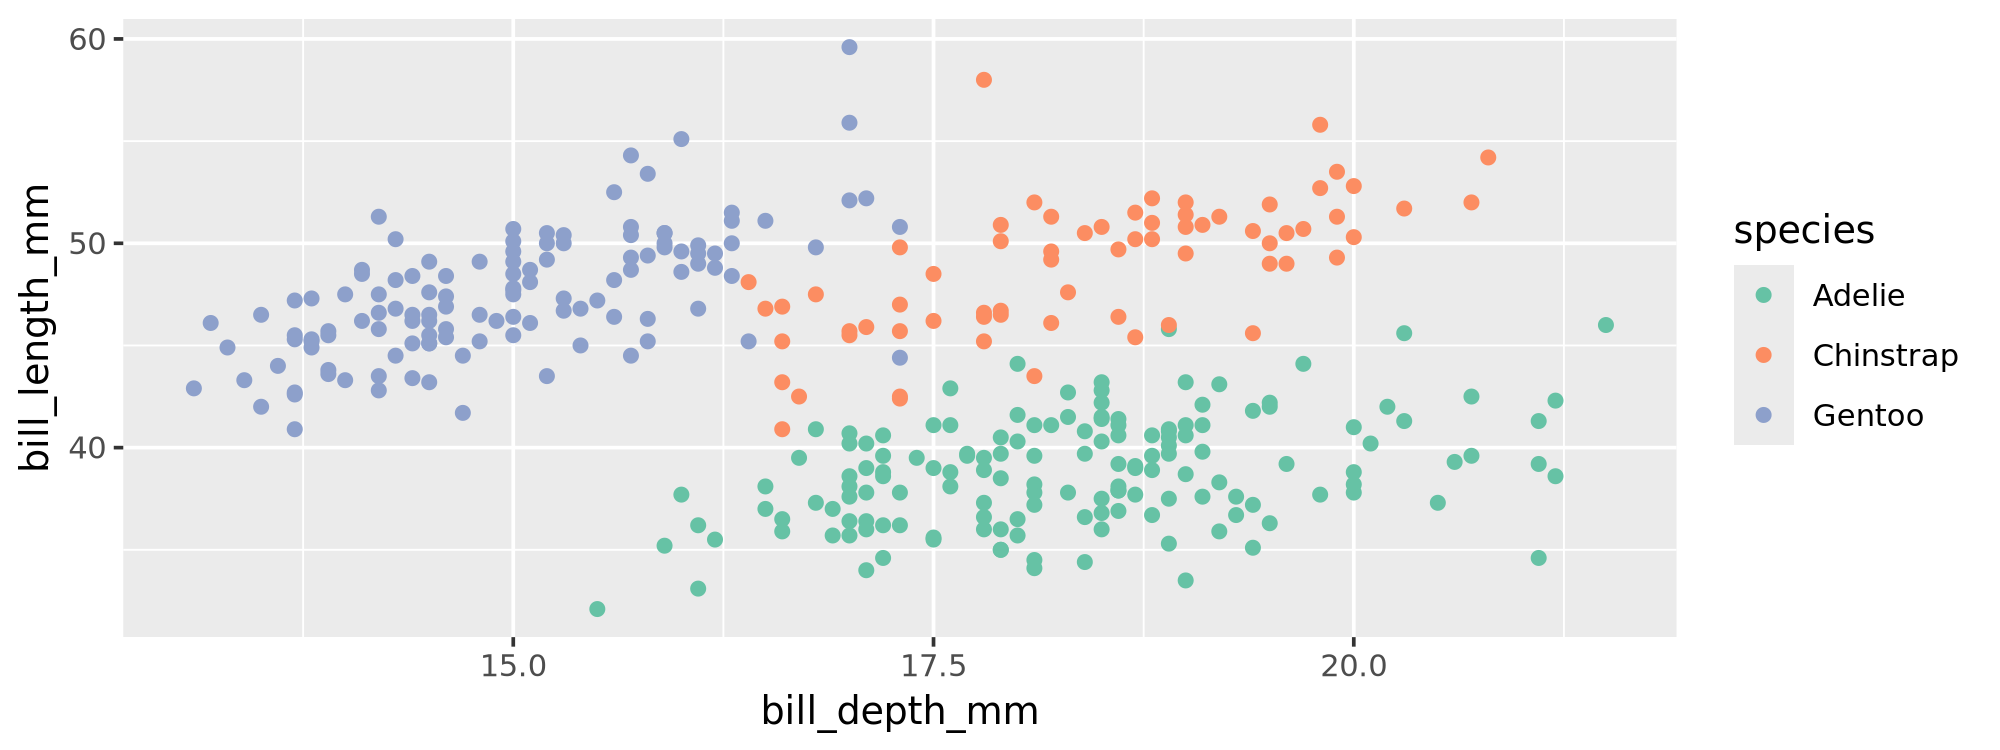

In [115]:
ggplot(data = penguins, mapping = aes(bill_depth_mm, bill_length_mm, color = species)) +
    geom_point() +
    scale_color_brewer(palette = "Set2")

### Histogram

Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Map penguin species to the `fill` property.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


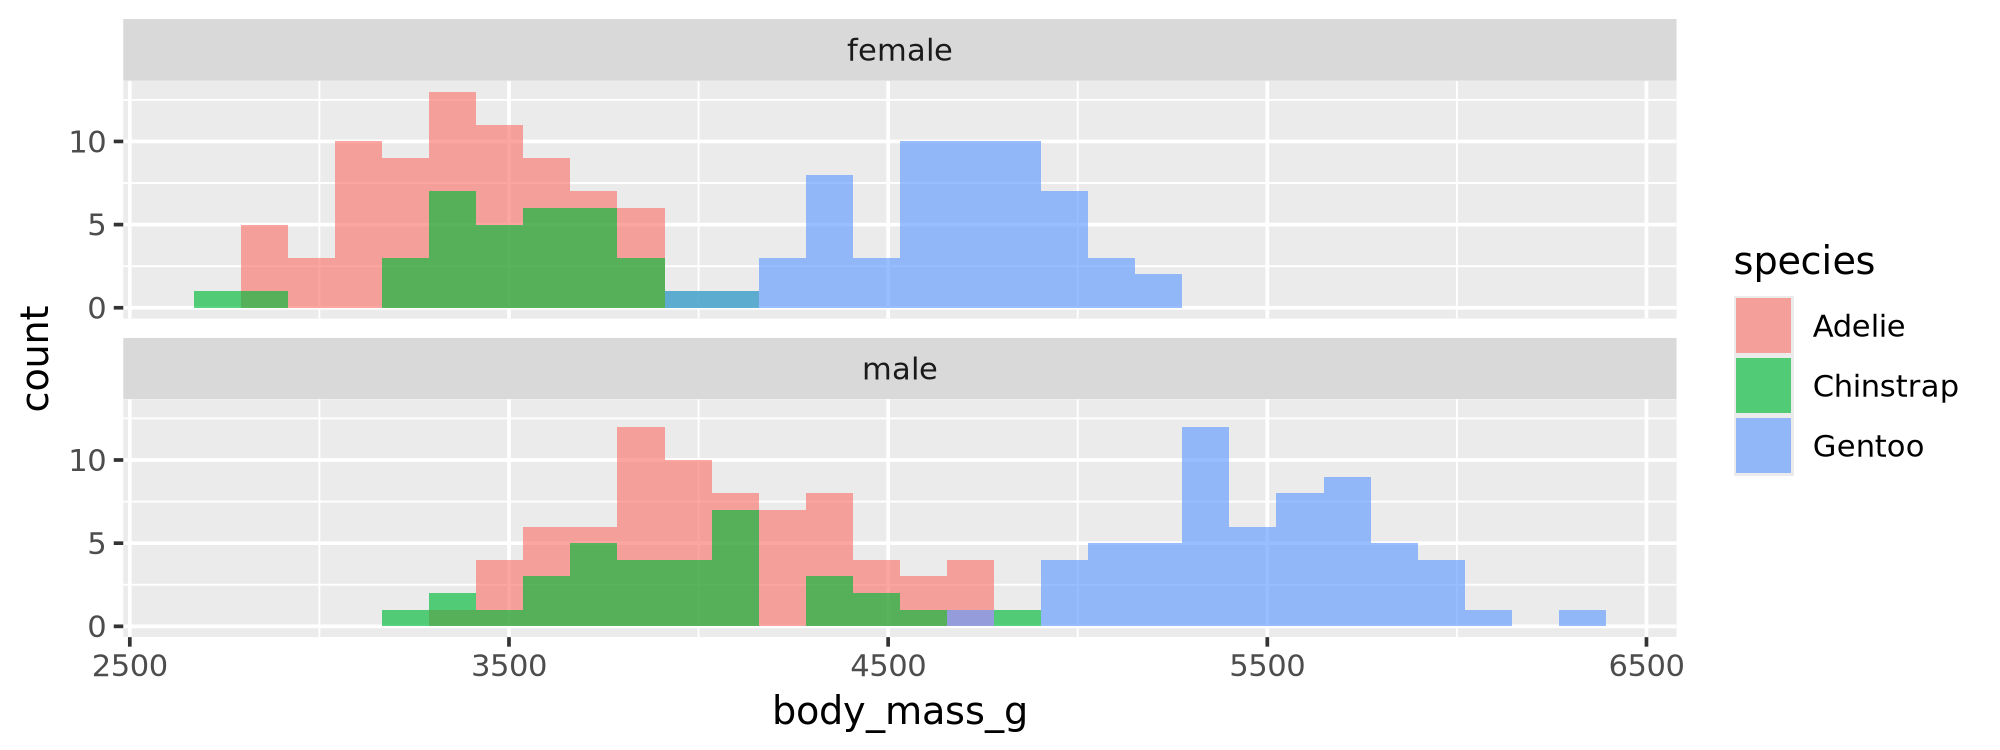

In [117]:
ggplot(na.omit(penguins), mapping = aes(x = body_mass_g, fill = species)) +
    geom_histogram(position = "identity", alpha = 0.65) +
    scale_color_brewer(palette = "Set2") +
    facet_wrap(~sex, ncol=1)

What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

Without position = "identity", the position argument is set to "stack" by default, and thus the bars of the histogram will be stacked on top of each other instead of overlapping each other.

## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [100]:
# uncomment the next two lines and execute this cell
data(txhousing)
glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [101]:
txhousing <- txhousing %>%
    select(-inventory) %>% 
    glimpse()

Rows: 8,602
Columns: 8
$ city     <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abile…
$ year     <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, 1…
$ volume   <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 12635…
$ median   <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 64500…
$ listings <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, 7…
$ date     <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, 2…


Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [102]:
dallas_sub <- txhousing %>%
    filter(city == "Dallas", year == 2012 | year == 2013) %>%
    glimpse()

Rows: 24
Columns: 8
$ city     <chr> "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "…
$ year     <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 2555, 3085, 4068, 4291, 5004, 5196, 4859, 5264, 4151, 4214, 3…
$ volume   <dbl> 509458081, 634067291, 898320563, 983333297, 1175419749, 12090…
$ median   <dbl> 150800, 157100, 167300, 168700, 175100, 177900, 176000, 17420…
$ listings <dbl> 16721, 17173, 17433, 17632, 17726, 17587, 17314, 16611, 15994…
$ date     <dbl> 2012.000, 2012.083, 2012.167, 2012.250, 2012.333, 2012.417, 2…


Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [103]:
dallas_sub <- dallas_sub %>%
    mutate(prct_sold = sales/listings * 100) %>%
    glimpse()

Rows: 24
Columns: 9
$ city      <chr> "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", …
$ year      <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 2555, 3085, 4068, 4291, 5004, 5196, 4859, 5264, 4151, 4214, …
$ volume    <dbl> 509458081, 634067291, 898320563, 983333297, 1175419749, 1209…
$ median    <dbl> 150800, 157100, 167300, 168700, 175100, 177900, 176000, 1742…
$ listings  <dbl> 16721, 17173, 17433, 17632, 17726, 17587, 17314, 16611, 1599…
$ date      <dbl> 2012.000, 2012.083, 2012.167, 2012.250, 2012.333, 2012.417, …
$ prct_sold <dbl> 15.28019, 17.96425, 23.33505, 24.33643, 28.22972, 29.54455, …


Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [112]:
dallas_summary <- dallas_sub %>%
    group_by(month) %>%
    summarize(avg_prct_sold = mean(prct_sold))

dallas_summary

month,avg_prct_sold
<int>,<dbl>
1,20.54462
2,23.47328
3,32.24472
4,34.46954
5,38.20168
6,37.19150
7,37.13028
8,38.51543
9,31.77096


Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [114]:
dallas_summary %>%
    slice_max(avg_prct_sold, n = 3)

month,avg_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [92]:
txhousing |>
   filter(year == 2012 | year == 2013, city == "Dallas") %>%
   mutate(prct_sold = sales/listings *100) |>
   group_by(month) |>
   summarize(mean_prct_sold = mean(prct_sold)) |>
   slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


First, the code is taking the txhousing data set and filtering the data to only keep the rows where the year is 2012 or 2013 and the city is Dallas. \
Next, the mutate function creates a new column called prct_sold which is the percentages of listings that acutally sold within the above filters. \
Then, the data is grouped by month and the summarize function calculates the average percentage of home sales by month over 2012 and 2013. \
Finally, the slice_max function grabs the top three highest average percent home sales to show us the three months where home sales were the highest on average